# An Introduction to Curve Fitting

## Least Squares Analysis

The aim of this notebook is to explain a little bit about basic curve fitting, and to get you to implement a simple method for doing so in python, and to interpret your results.

Curve fitting is an important tool in data analysis. Imagine that you have a theory and that given a set of parameters $\{\alpha_i\}$ and that for a given value of $x$, the theory gives you the value $Y\Big(x_i; \{\alpha_i\}\Big)$.

Suppose that you perform an experiment to test your theory. How can you  compute the line of best fit given the data that you have? One starting point would be to consider the difference between a general function $Y$ and your measured data $y_i$,

\begin{equation}
    \Delta_i = Y\Big(x_i; \{\alpha_i\}\Big) - y_i
\end{equation}

One could then minimise the functional in order to find the values of $\alpha_i$,

\begin{equation}
    S(\{\alpha_i\}) = \sum^{N}_{j=1} \Delta^2_i = \sum^{N}_{j=1} \Big[Y\Big(x_i; \{\alpha_i\}\Big) - y_i\Big]^2
\end{equation}

This is the *least squares method*. This method is commonly used, but it does not take into account any errors in the data points. The error of these measurements can be written as $\sigma_i$.

How much trust do you place in data points with large amounts of error? The $\chi^2$ method computes the least squares by weighing each square difference by the square of the errors in those values.

\begin{equation}
    \chi^2 = \sum^{N}_{j=1} \frac{\Delta^2_i}{\sigma^2_i} = \sum^{N}_{j=1} \frac{1}{\sigma^2_i}\Big[Y\Big(x_i; \{\alpha_i\}\Big) - y_i\Big]^2
\end{equation}

### Linear Regression

In the case of the linear function,

\begin{equation}
    Y\Big(x_i; \{\alpha_i\}\Big) = \alpha_1 + \alpha_2x
\end{equation}

We can write our $\chi^2$ functional,

\begin{equation}
    \chi^2 = \sum^N_{i=1} \frac{1}{\sigma^2_i} \Big( \alpha_1 + \alpha_2x_i - y_i \Big)^2
\end{equation}

Now, we want to *simultaneously* minimise the above expression with respect to both of the parameters $\alpha_1$ and $\alpha_2$, i.e.

\begin{equation}
    \frac{\partial \chi^2}{\partial \alpha_1} = \frac{\partial \chi^2}{\partial \alpha_2} = 0
\end{equation}



## Exercises

#### Exercise 1

Use a pen and paper for this exercise. Using the equations above, find an expression for $\alpha_1$ and $\alpha_2$.

*Hint*: It will save you a lot of ink if you work with the following expressions,

\begin{equation}
    S \equiv \sum^N_{i=1} \frac{1}{\sigma^2_i}
\end{equation}
\begin{equation}
    \sum x \equiv \sum^N_{i=1} \frac{x_i}{\sigma^2_i}
\end{equation}
\begin{equation}
    \sum y \equiv \sum^N_{i=1} \frac{y_i}{\sigma^2_i}
\end{equation}
\begin{equation}
    \sum xy \equiv \sum^N_{i=1} \frac{x_i y_i}{\sigma^2_i}
\end{equation}
\begin{equation}
    \sum x^2 \equiv \sum^N_{i=1} \frac{x^2_i}{\sigma^2_i}
\end{equation}

#### Exercise 2

Using the results you have defined above, define the functions *alpha_one* and *alpha_two* to compute the results obtained in Exercise 1. 

Define a function *chi_sq* to compute the $\chi^2$ value given x, y, and error data, as well as the fitted coefficients.

*Hint*: It may be useful to define functions to define the function *list_product*, and returns the pairwise product of two lists. A function *list_power* could return a list where the elements of the list have been exponentiated by a given power. If you wanted to keep your code concise, you could define a function *lin_reg_sums* that would calculate the summations from Exercise 1 and return them, so you don't have to write the same code twice. 

In [1]:
def list_product(x, y):
    # Assumes that len(x) == len(y). Could use a zip but I think that this is clearer.
    result = []
    i = 0
    while i < len(x):
        result.append(x[i] * y[i])
        i += 1
    return result

def list_power(x, power):
    return [x_i ** power for x_i in x]

def lin_reg_sums(x, y, sigma):
    inverse_sigma_sq = list_power(sigma, -2)
    S = sum(inverse_sigma_sq)
    sum_x = sum(list_product(x, inverse_sigma_sq))
    sum_y = sum(list_product(y, inverse_sigma_sq))
    sum_xy = sum(list_product(list_product(x, y), inverse_sigma_sq))
    sum_x_sq = sum(list_product(list_power(x, 2), inverse_sigma_sq))
    
    return S, sum_x, sum_y, sum_xy, sum_x_sq

def alpha_one(x, y, sigma):
    ### BEGIN SOLUTION
    S, sum_x, sum_y, sum_xy, sum_x_sq = lin_reg_sums(x, y, sigma)
    return (sum_x * sum_xy - sum_y * sum_x_sq) / (sum_x * sum_x - S*sum_x_sq)
    ### END SOLUTION
    
def alpha_two(x, y, sigma):
    ### BEGIN SOLUTION
    S, sum_x, sum_y, sum_xy, sum_x_sq = lin_reg_sums(x, y, sigma)
    return (S * sum_xy - sum_y * sum_x) / (S * sum_x_sq - sum_x * sum_x)
    ### END SOLUTION

def chi_sq(x, y, sigma, a1, a2):
    ### BEGIN SOLUTION
    inverse_sigma_sq = list_power(sigma, -2)
    result = 0.0
    i = 0
    while i < len(x):
        result += inverse_sigma_sq[i] * (a1 + a2*x[i] - y[i]) ** 2
        i += 1
    return result
    ### END SOLUTION

#### Exercise 3

You'll have to import the following in order to do Exercises 3 & 4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

/home/niall/.local/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [3]:
x_data = [ 0.        ,  0.02702703,  0.05405405,  0.08108108,  0.10810811,
        0.13513514,  0.16216216,  0.18918919,  0.21621622,  0.24324324,
        0.27027027,  0.2972973 ,  0.32432432,  0.35135135,  0.37837838,
        0.40540541,  0.43243243,  0.45945946,  0.48648649,  0.51351351,
        0.54054054,  0.56756757,  0.59459459,  0.62162162,  0.64864865,
        0.67567568,  0.7027027 ,  0.72972973,  0.75675676,  0.78378378,
        0.81081081,  0.83783784,  0.86486486,  0.89189189,  0.91891892,
        0.94594595,  0.97297297,  1.        ,  1.02702703,  1.05405405,
        1.08108108,  1.10810811,  1.13513514,  1.16216216,  1.18918919,
        1.21621622,  1.24324324,  1.27027027,  1.2972973 ,  1.32432432,
        1.35135135,  1.37837838,  1.40540541,  1.43243243,  1.45945946,
        1.48648649,  1.51351351,  1.54054054,  1.56756757,  1.59459459,
        1.62162162,  1.64864865,  1.67567568,  1.7027027 ,  1.72972973,
        1.75675676,  1.78378378,  1.81081081,  1.83783784,  1.86486486,
        1.89189189,  1.91891892,  1.94594595,  1.97297297,  2.        ]
y_data = [ 1715.34920126,  1665.21523988,  1774.45091869,  1828.66652369,
        1555.72326364,  1469.88588144,  1108.90472417,  1243.73101962,
        1292.35856777,  1184.06049529,  1044.20684963,  1094.30542601,
         996.81975868,   954.37618325,   941.32913188,   813.36356286,
         768.42338041,   709.84782875,   595.92070827,   680.69741981,
         620.58047325,   513.68968516,   530.25489618,   541.18795209,
         641.73639804,   572.39481094,   444.63295736,   459.16514234,
         420.44998003,   363.28598452,   406.50463289,   310.4922875 ,
         301.89791513,   295.62094401,   303.84313061,   260.51104107,
         222.4496488 ,   258.11348382,   232.35535502,   201.59604244,
         218.32078242,   192.07024887,   178.57796211,   193.20579333,
         162.14473989,   160.37839097,   156.14875129,   141.42662955,
         121.72267501,   140.29112533,   119.13419103,   133.81233379,
         120.18799917,   112.85612673,   101.6705183 ,   112.99798613,
          86.63397703,    80.71477025,    63.26355641,    69.96106292,
          64.3746736 ,    73.1442049 ,    62.40806966,    61.6580336 ,
          54.47055026,    58.34660418,    49.53242533,    49.05857511,
          42.82570678,    53.07636182,    36.34390448,    38.94404624,
          36.53742488,    30.35966406,    30.08903989]
error_data = [ 0.91534109,  0.93834808,  1.05589508,  1.14909112,  1.03232271,
        1.02998271,  0.82054751,  0.97184978,  1.06639692,  1.03174632,
        0.96083487,  1.06331992,  1.02283414,  1.03412099,  1.07710102,
        0.98279476,  0.98048707,  0.95646645,  0.84792246,  1.0227864 ,
        0.98467322,  0.86071238,  0.93822083,  1.01118748,  1.26620323,
        1.19262968,  0.97830609,  1.06685451,  1.03160586,  0.94126365,
        1.1122216 ,  0.89709787,  0.9211117 ,  0.95246838,  1.03377963,
        0.93598279,  0.8439887 ,  1.03413868,  0.9830689 ,  0.9006923 ,
        1.03003672,  0.95693163,  0.9395326 ,  1.07341415,  0.95129062,
        0.99361785,  1.0215867 ,  0.97708216,  0.88804416,  1.08082767,
        0.96922778,  1.14960531,  1.09037755,  1.08119522,  1.02857791,
        1.20719114,  0.97736497,  0.96157843,  0.79588163,  0.92942523,
        0.90310091,  1.08358839,  0.97631137,  1.01859244,  0.95024528,
        1.07486204,  0.96358474,  1.00780946,  0.92903317,  1.21588082,
        0.87919382,  0.99484929,  0.98563777,  0.86484752,  0.90513653]

Plot the following data.

<IPython.core.display.Javascript object>


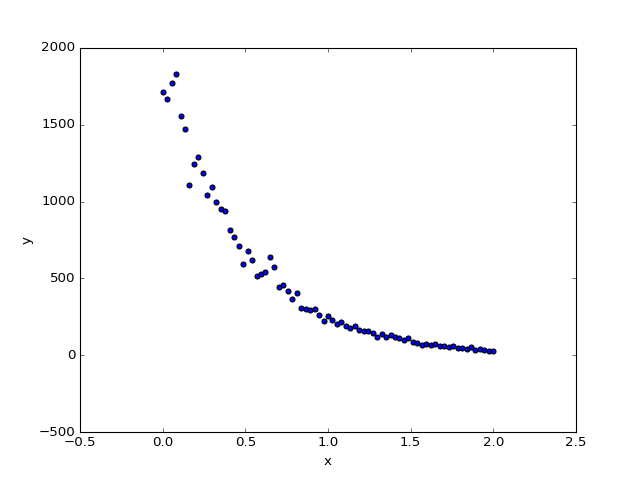

In [8]:
a_fig = plt.figure()
plt.scatter(x_data, y_data)
plt.xlabel(r'x')
plt.ylabel(r'y')

Find a fit for this graph using linear recursion. Plot the linear relation against the data you derive it from.

<IPython.core.display.Javascript object>


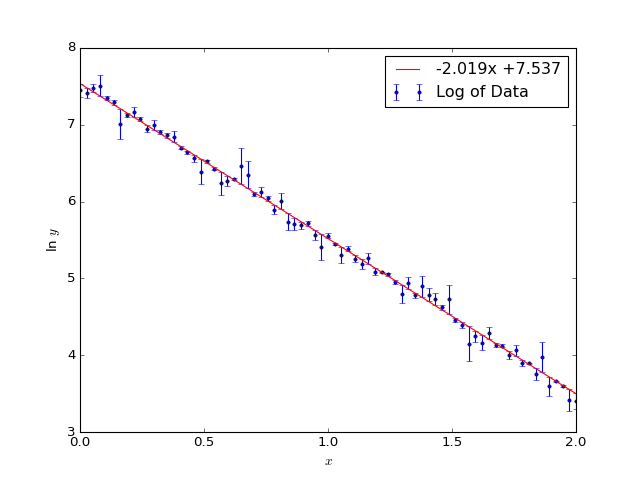

In [7]:
b_fig = plt.figure()

# The data fits an exponential decay, to get a linear progression take logs.
y_log_data = np.log(y_data)
error_log_data = np.log(error_data)

# Create the fit
c = alpha_one(x_data, y_log_data, np.log(error_data))
m = alpha_two(x_data, y_log_data, np.log(error_data))
fit_line = [c + m*x_i for x_i in x_data]

plt.errorbar(x_data, y_log_data, yerr=error_log_data, markersize=3, fmt='o', label='Log of Data')
plt.plot(x_data, fit_line, 'r', label=str(round(m,3))+'x +'+str(round(c,3)))
plt.xlabel(r'$x$')
plt.ylabel(r'ln$\ y$')
plt.legend()

Print the value of $\chi^2$ from the fit. Comment on this value in the cell below your code.

In [6]:
print(chi_sq(x_data, y_log_data, error_log_data, c, m), len(x))

NameError: name 'x' is not defined

Comment:

The error on the gradient can be given as,

\begin{equation}
    \sigma_m = \sqrt{\frac{S}{S\sum x^2 - (\sum x)^2}}
\end{equation}

Write a function to find the error of the gradient on your fit. Print the value of this error below. The gradient one would expect should be $-2.016$. Is your error within range?

In [9]:
def sigma_m(x, y, sigma):
    S, sum_x, sum_y, sum_xy, sum_x_sq = lin_reg_sums(x, y, sigma)
    return np.sqrt(S/(S*sum_x_sq - sum_x * sum_x))

print(m, sigma_m(x_data, y_log_data, error_log_data))

-2.01929783626 0.00459643545141


#### Exercise 4

Are the results of a linear regression output always useful? Should we use it [for support, rather than illumination](https://en.wikiquote.org/wiki/Andrew_Lang)?

In this next exercise, you are given a data set. Follow the instructions, calculating the gradients and intercepts, finally plotting the data and the best fit lines.

The following dataset is provided from [here](
https://www.jstor.org/stable/2682899?seq=1#page_scan_tab_contents). You can access each x, y list from the following by using (for example, where i is an index):

```python
    data[i][0]
``` for the x values.

```python
    data[i][1]
``` for the y values.

The error becomes irrelevant if they all have the same value.
Not sure? Check the equations in the case where $\sigma_i$ is a constant value.

In [ ]:
data = [([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]),
    ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]),
    ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]),
    ([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
]
error = [1 for element in data[0][0]]

Using the functions you wrote in Exercise 3, find the intercept and gradients for the four data sets and print them below.

In [ ]:
for i in range(0, 4):
    a1 = alpha_one(data[i][0], data[i][1], error)
    a2 = alpha_two(data[i][0], data[i][1], error)
    print(a1, a2)

Plot the data, and the lines of best fit over four subplots. Write a comment in a Markdown cell below the plots.

In [ ]:
fig, axarray = plt.subplots(2, 2, sharex='col', sharey='row')

x = np.linspace(0, 20)

for i in range(0, 2):
    for j in range(0,2):
        
        # Comput the fit data
        a1 = alpha_one(data[2*i+j][0], data[2*i+j][1], error)
        a2 = alpha_two(data[2*i+j][0], data[2*i+j][1], error)
        y_fit = [a1 + a2*x_i for x_i in x]
        
        # Cycle through the subplots, plot the data points, and the fit
        axarray[i][j].scatter(data[2*i+j][0], data[2*i+j][1])
        axarray[i][j].plot(x, y_fit)
        
        # Tidy up the plots
        axarray[i][j].relim()
        axarray[i][j].autoscale_view(True, True, True)

Comment: